In [186]:
from test.test_hmc import test_hmc_diag_std_normal, test_hmc_binom

# test_hmc_diag_std_normal()
test_hmc_binom()

draws[200:210]=array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])
mean=nan  var=nan
acceptance rate : 1.0


AssertionError: 
Not equal to tolerance rtol=1e-07, atol=0.05

x and y nan location mismatch:
 x: array(nan)
 y: array(0.35)

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from test.models.std_normal import StdNormal
from bayes_kit.drhmc import DRHMC

# autoreload modules with jupyter magic
%load_ext autoreload
%autoreload 2

np.seterr(all='raise')
sns.set_theme()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [240]:
def test_drhmc_diag_std_normal() -> None:
    # init with draw from posterior
    init = np.random.normal(loc=0, scale=1, size=[1])
    model = StdNormal()
    num_proposals = 1
    # TODO: change stepsize_fn and steps_fn to be exponential
    # stepsize_fn, steps_fn = lambda t: 0.25 / (t + 1), lambda t: 10 * (t + 1)
    a = 2
    stepsize_fn, steps_fn = lambda t: 0.25 * (a ** -t), lambda t: 10 * (a ** t)
    drhmc = DRHMC(model, num_proposals, stepsize_fn, steps_fn, init=init)

    M = 10000
    # draws = np.array([drhmc.sample()[0] for _ in range(M)])
    draws = np.zeros(M)
    for i in range(M):
        draws[i] = drhmc.sample()[0]
    # histogram of draws
    plt.hist(draws, bins=100)

    mean = draws.mean(axis=0)
    var = draws.var(axis=0, ddof=1)
    
    #return draws
    np.testing.assert_allclose(mean, model.posterior_mean(), atol=0.1)
    np.testing.assert_allclose(var, model.posterior_variance(), atol=0.1)
    

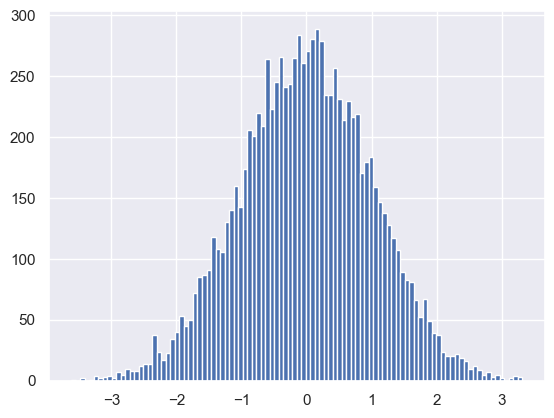

In [250]:
draws = test_drhmc_diag_std_normal()